# Exploratory Data Analysis - Sentiment Analysis Dataset

This notebook performs comprehensive exploratory data analysis on the IMDb sentiment dataset.

## Objectives
- Load and explore the IMDb dataset
- Analyze class distribution
- Examine text length statistics
- Visualize data characteristics
- Generate word clouds
- Define train/validation/test split strategy

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset
from collections import Counter
import warnings
import json
from pathlib import Path

warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

/Users/gourabnanda/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Libraries imported successfully!


## 1. Dataset Loading

We'll use the IMDb movie review dataset from Hugging Face. This dataset contains 50,000 highly polar movie reviews for binary sentiment classification.

In [2]:
# Load IMDb dataset
print("Loading IMDb dataset...")
dataset = load_dataset("imdb")

print("\nDataset loaded successfully!")
print(f"\nDataset structure: {dataset}")

Loading IMDb dataset...

Dataset loaded successfully!

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Dataset loaded successfully!

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [3]:
# Convert to pandas for easier analysis
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print(f"Training set size: {len(train_df):,}")
print(f"Test set size: {len(test_df):,}")
print(f"\nTotal samples: {len(train_df) + len(test_df):,}")

Training set size: 25,000
Test set size: 25,000

Total samples: 50,000


In [4]:
# Display first few samples
print("Sample reviews from training set:\n")
train_df.head()

Sample reviews from training set:



,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


## 2. Class Distribution Analysis

In [5]:
# Analyze class distribution
train_class_dist = train_df['label'].value_counts().sort_index()
test_class_dist = test_df['label'].value_counts().sort_index()

print("Training Set Class Distribution:")
print(f"Negative (0): {train_class_dist[0]:,} ({train_class_dist[0]/len(train_df)*100:.2f}%)")
print(f"Positive (1): {train_class_dist[1]:,} ({train_class_dist[1]/len(train_df)*100:.2f}%)")

print("\nTest Set Class Distribution:")
print(f"Negative (0): {test_class_dist[0]:,} ({test_class_dist[0]/len(test_df)*100:.2f}%)")
print(f"Positive (1): {test_class_dist[1]:,} ({test_class_dist[1]/len(test_df)*100:.2f}%)")

Training Set Class Distribution:
Negative (0): 12,500 (50.00%)
Positive (1): 12,500 (50.00%)

Test Set Class Distribution:
Negative (0): 12,500 (50.00%)
Positive (1): 12,500 (50.00%)


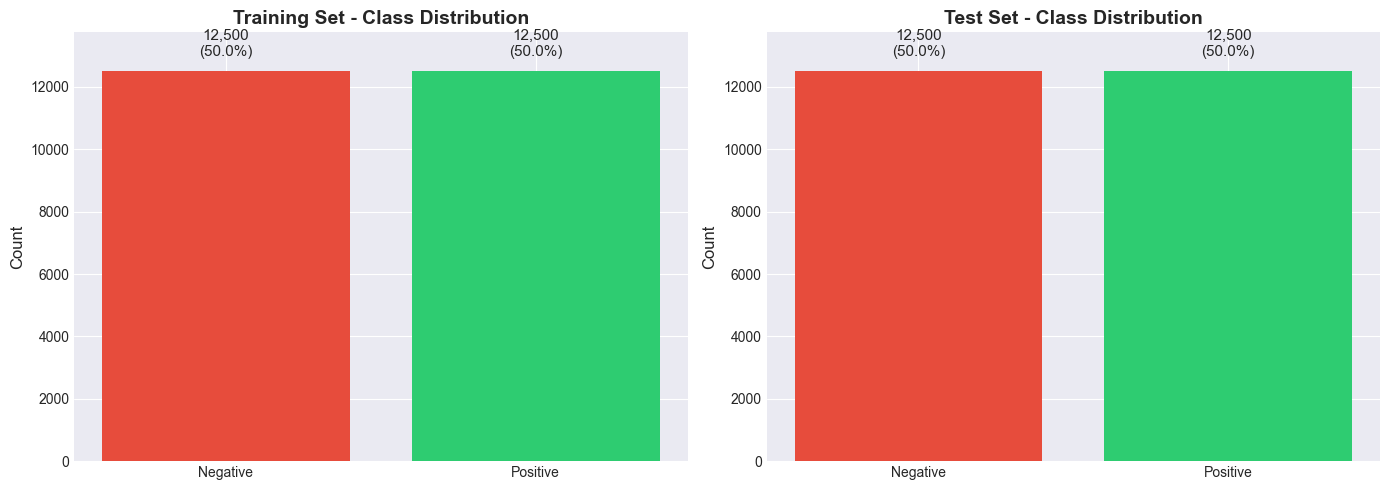


Class distribution is balanced in both train and test sets.


In [6]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].bar(['Negative', 'Positive'], train_class_dist.values, color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_ylim(0, max(train_class_dist.values) * 1.1)
for i, v in enumerate(train_class_dist.values):
    axes[0].text(i, v + 500, f'{v:,}\n({v/len(train_df)*100:.1f}%)', ha='center', fontsize=11)

# Test set
axes[1].bar(['Negative', 'Positive'], test_class_dist.values, color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Test Set - Class Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_ylim(0, max(test_class_dist.values) * 1.1)
for i, v in enumerate(test_class_dist.values):
    axes[1].text(i, v + 500, f'{v:,}\n({v/len(test_df)*100:.1f}%)', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('../reports/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClass distribution is balanced in both train and test sets.")

## 3. Text Length Analysis

In [7]:
# Calculate text statistics
train_df['text_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

test_df['text_length'] = test_df['text'].apply(len)
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))

print("Training Set - Text Statistics:")
print(f"Average character length: {train_df['text_length'].mean():.2f}")
print(f"Median character length: {train_df['text_length'].median():.2f}")
print(f"Min character length: {train_df['text_length'].min()}")
print(f"Max character length: {train_df['text_length'].max()}")
print(f"\nAverage word count: {train_df['word_count'].mean():.2f}")
print(f"Median word count: {train_df['word_count'].median():.2f}")
print(f"Min word count: {train_df['word_count'].min()}")
print(f"Max word count: {train_df['word_count'].max()}")

Training Set - Text Statistics:
Average character length: 1325.07
Median character length: 979.00
Min character length: 52
Max character length: 13704

Average word count: 233.79
Median word count: 174.00
Min word count: 10
Max word count: 2470


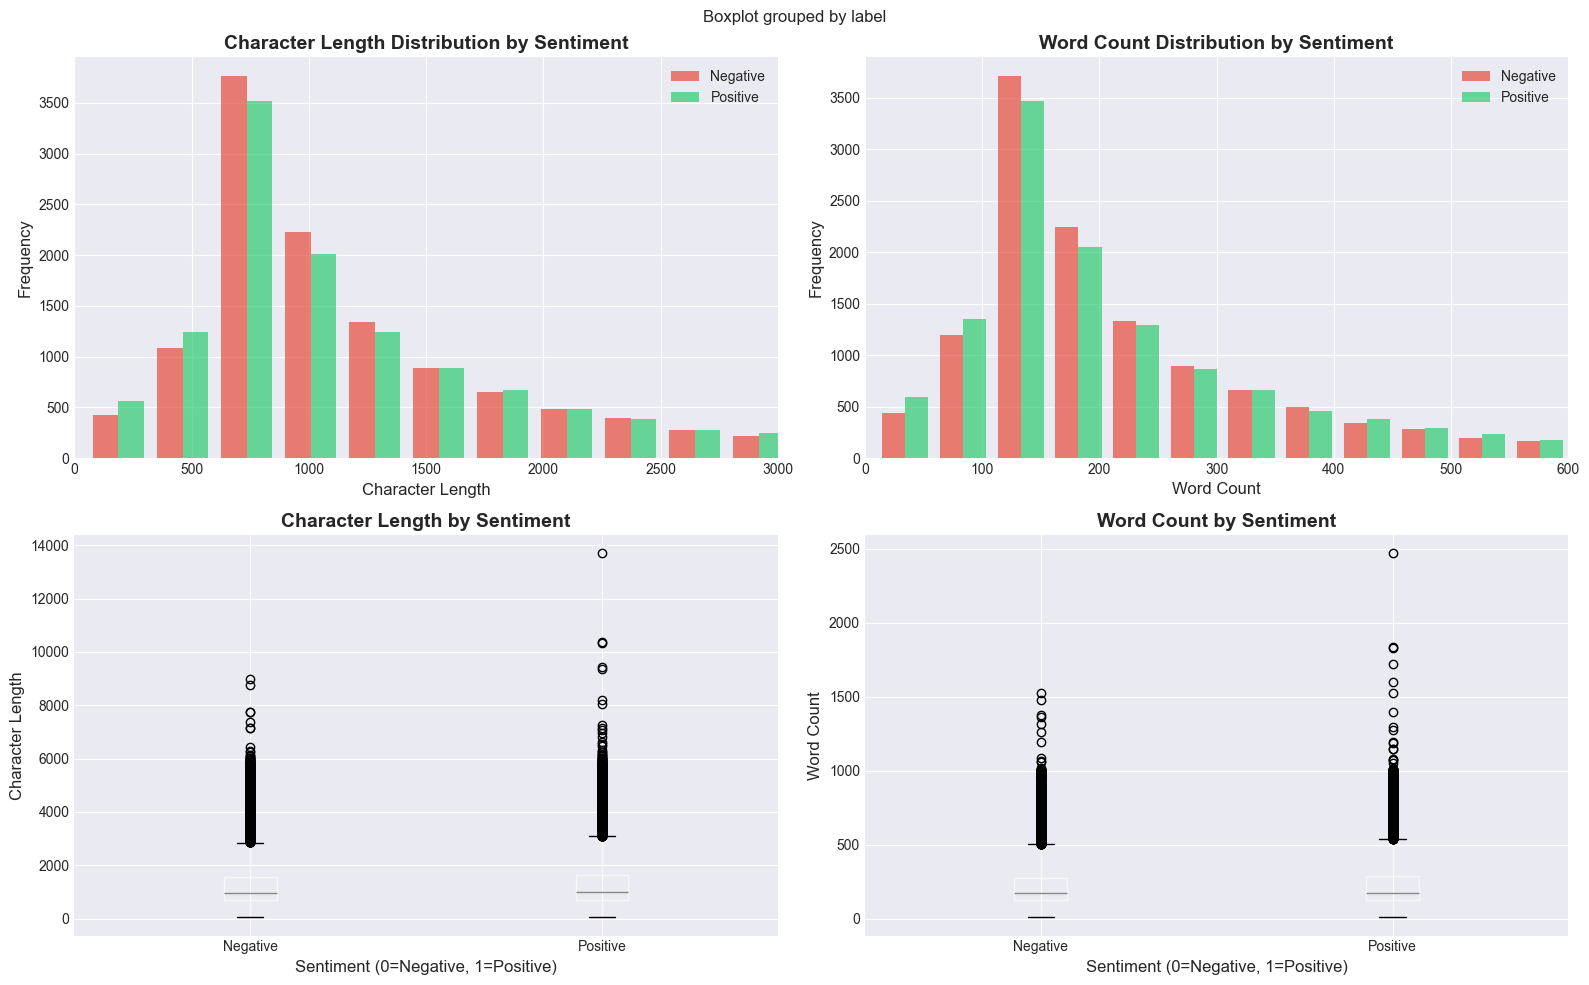

In [8]:
# Text length distribution by sentiment
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Character length distribution
axes[0, 0].hist([train_df[train_df['label']==0]['text_length'], 
                 train_df[train_df['label']==1]['text_length']], 
                bins=50, label=['Negative', 'Positive'], color=['#e74c3c', '#2ecc71'], alpha=0.7)
axes[0, 0].set_title('Character Length Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Character Length', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 3000)

# Word count distribution
axes[0, 1].hist([train_df[train_df['label']==0]['word_count'], 
                 train_df[train_df['label']==1]['word_count']], 
                bins=50, label=['Negative', 'Positive'], color=['#e74c3c', '#2ecc71'], alpha=0.7)
axes[0, 1].set_title('Word Count Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Word Count', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 600)

# Box plot for character length
train_df.boxplot(column='text_length', by='label', ax=axes[1, 0])
axes[1, 0].set_title('Character Length by Sentiment', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=12)
axes[1, 0].set_ylabel('Character Length', fontsize=12)
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Negative', 'Positive'])

# Box plot for word count
train_df.boxplot(column='word_count', by='label', ax=axes[1, 1])
axes[1, 1].set_title('Word Count by Sentiment', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=12)
axes[1, 1].set_ylabel('Word Count', fontsize=12)
plt.sca(axes[1, 1])
plt.xticks([1, 2], ['Negative', 'Positive'])

plt.tight_layout()
plt.savefig('../reports/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Sample Reviews

In [9]:
# Display sample negative reviews
print("=" * 80)
print("SAMPLE NEGATIVE REVIEWS")
print("=" * 80)

negative_samples = train_df[train_df['label'] == 0].sample(3, random_state=42)
for idx, (i, row) in enumerate(negative_samples.iterrows(), 1):
    print(f"\nNegative Review {idx}:")
    print(f"Length: {row['word_count']} words")
    print(f"Text: {row['text'][:300]}...")
    print("-" * 80)

SAMPLE NEGATIVE REVIEWS

Negative Review 1:
Length: 130 words
Text: Wow, what a total let down! The fact people think this film is scary is ridiculous. The special effects were a direct rip-off of "The ring." The story? Was there one? Not in my opinion..Just a bunch of flashy imaging. The entire film was a boring, stupid, mess. I guess there is always a market for b...
--------------------------------------------------------------------------------

Negative Review 2:
Length: 95 words
Text: If Bob Ludlum was to see this mini series, he would have cried. This was complete waste of time and money. I have read the book and even though movies are not exactly what the book may be, CBS wasted time and money on this and it is embarrassing to claim that this was Ludlum's work.<br /><br />May b...
--------------------------------------------------------------------------------

Negative Review 3:
Length: 170 words
Text: To call a film about a crippled ghost taking revenge from beyond the grave 

In [10]:
# Display sample positive reviews
print("=" * 80)
print("SAMPLE POSITIVE REVIEWS")
print("=" * 80)

positive_samples = train_df[train_df['label'] == 1].sample(3, random_state=42)
for idx, (i, row) in enumerate(positive_samples.iterrows(), 1):
    print(f"\nPositive Review {idx}:")
    print(f"Length: {row['word_count']} words")
    print(f"Text: {row['text'][:300]}...")
    print("-" * 80)

SAMPLE POSITIVE REVIEWS

Positive Review 1:
Length: 110 words
Text: This movie is to Halloween what the hilarious "Christmas Story" is to Christmas: both are relatively low-budget, no-big-name-stars type films...and both are two of the absolute greatest and funniest movies available, both seasonal CLASSICS!!! "Spaced Invaders" comes galloping out right from the star...
--------------------------------------------------------------------------------

Positive Review 2:
Length: 107 words
Text: Good western filmed in the rocky Arizona wilds. Lots of tough guys throughout; Cobern's character seemed to rock back and forth between a raging psycho and a laid back type. Several holes appeared in the picture, but not enough to offset it being exciting and worth seeing. One really dumb scene show...
--------------------------------------------------------------------------------

Positive Review 3:
Length: 233 words
Text: John Singleton's finest film, before blockbuster wannabees like the Shaft 

## 5. Word Cloud Visualization

In [11]:
# Install wordcloud if not already installed
try:
    from wordcloud import WordCloud, STOPWORDS
except ImportError:
    print("Installing wordcloud...")
    !pip install wordcloud -q
    from wordcloud import WordCloud, STOPWORDS

print("WordCloud library ready!")

WordCloud library ready!


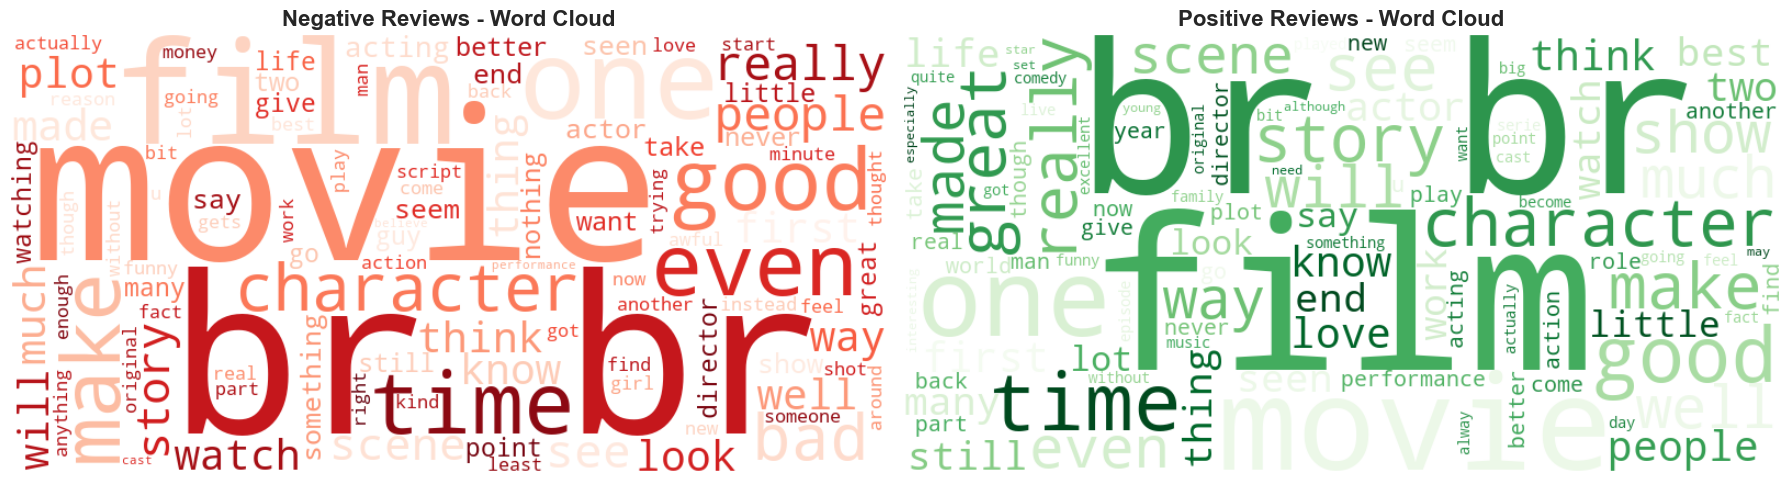

In [12]:
# Generate word clouds for positive and negative reviews
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Negative reviews word cloud
negative_text = ' '.join(train_df[train_df['label'] == 0]['text'].sample(1000, random_state=42))
wordcloud_neg = WordCloud(width=800, height=400, 
                          background_color='white',
                          stopwords=STOPWORDS,
                          colormap='Reds',
                          max_words=100).generate(negative_text)

axes[0].imshow(wordcloud_neg, interpolation='bilinear')
axes[0].set_title('Negative Reviews - Word Cloud', fontsize=16, fontweight='bold')
axes[0].axis('off')

# Positive reviews word cloud
positive_text = ' '.join(train_df[train_df['label'] == 1]['text'].sample(1000, random_state=42))
wordcloud_pos = WordCloud(width=800, height=400, 
                          background_color='white',
                          stopwords=STOPWORDS,
                          colormap='Greens',
                          max_words=100).generate(positive_text)

axes[1].imshow(wordcloud_pos, interpolation='bilinear')
axes[1].set_title('Positive Reviews - Word Cloud', fontsize=16, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('../reports/wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Top Words Analysis

In [13]:
# Function to get top words
def get_top_words(text_series, n=20):
    words = ' '.join(text_series).lower().split()
    # Remove common stopwords
    stopwords = set(STOPWORDS)
    words = [word for word in words if word not in stopwords and len(word) > 3]
    return Counter(words).most_common(n)

# Get top words for each sentiment
negative_words = get_top_words(train_df[train_df['label'] == 0]['text'].sample(5000, random_state=42))
positive_words = get_top_words(train_df[train_df['label'] == 1]['text'].sample(5000, random_state=42))

print("Top 20 words in Negative reviews:")
for word, count in negative_words:
    print(f"  {word}: {count}")

print("\nTop 20 words in Positive reviews:")
for word, count in positive_words:
    print(f"  {word}: {count}")

Top 20 words in Negative reviews:
  /><br: 10271
  movie: 6873
  film: 5402
  even: 2960
  good: 2325
  really: 2271
  much: 1845
  make: 1723
  people: 1674
  will: 1573
  first: 1561
  made: 1558
  time: 1553
  story: 1476
  />the: 1458
  think: 1381
  movie.: 1269
  never: 1257
  little: 1199
  watch: 1199

Top 20 words in Positive reviews:
  /><br: 9796
  film: 5803
  movie: 5360
  good: 2492
  great: 2214
  really: 2058
  will: 2058
  story: 1971
  even: 1821
  first: 1651
  much: 1637
  time: 1545
  />the: 1504
  well: 1480
  many: 1454
  best: 1425
  people: 1386
  love: 1382
  made: 1348
  think: 1312


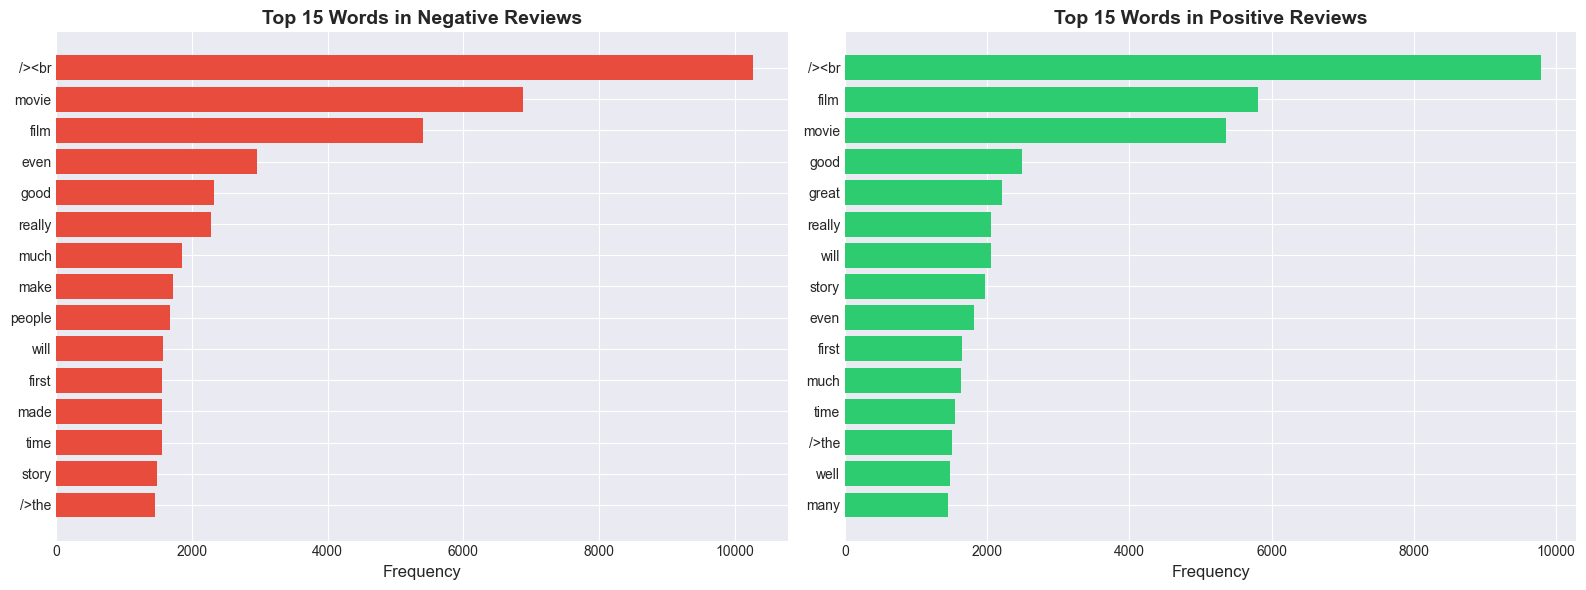

In [14]:
# Visualize top words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Negative words
words_neg, counts_neg = zip(*negative_words[:15])
axes[0].barh(words_neg, counts_neg, color='#e74c3c')
axes[0].set_title('Top 15 Words in Negative Reviews', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].invert_yaxis()

# Positive words
words_pos, counts_pos = zip(*positive_words[:15])
axes[1].barh(words_pos, counts_pos, color='#2ecc71')
axes[1].set_title('Top 15 Words in Positive Reviews', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../reports/top_words.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Data Split Strategy

For this project, we'll use the following split strategy:

### Current Dataset Split
- **Training Set**: 25,000 samples (50%)
- **Test Set**: 25,000 samples (50%)

### Proposed Split for Model Training
We'll further split the training set into train/validation:
- **Training**: 20,000 samples (80% of original train = 40% of total)
- **Validation**: 5,000 samples (20% of original train = 10% of total)
- **Test**: 25,000 samples (50% of total, kept separate)

This gives us an approximate **70/15/15** split when considering the full dataset.

Proposed Data Split:
Total samples: 50,000

Training: 20,000 (40.0%)
Validation: 5,000 (10.0%)
Test: 25,000 (50.0%)


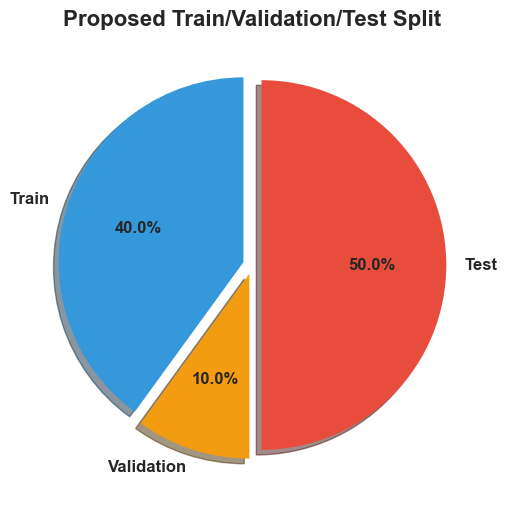

In [15]:
# Calculate split ratios
total_samples = len(train_df) + len(test_df)
proposed_train = 20000
proposed_val = 5000
proposed_test = len(test_df)

print("Proposed Data Split:")
print(f"Total samples: {total_samples:,}")
print(f"\nTraining: {proposed_train:,} ({proposed_train/total_samples*100:.1f}%)")
print(f"Validation: {proposed_val:,} ({proposed_val/total_samples*100:.1f}%)")
print(f"Test: {proposed_test:,} ({proposed_test/total_samples*100:.1f}%)")

# Visualize split
fig, ax = plt.subplots(figsize=(10, 6))
splits = ['Train', 'Validation', 'Test']
sizes = [proposed_train, proposed_val, proposed_test]
colors = ['#3498db', '#f39c12', '#e74c3c']
explode = (0.05, 0.05, 0.05)

ax.pie(sizes, explode=explode, labels=splits, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Proposed Train/Validation/Test Split', fontsize=16, fontweight='bold')

plt.savefig('../reports/data_split.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Generate Data Statistics Summary Report

In [16]:
# Create comprehensive statistics dictionary
stats_summary = {
    "dataset_name": "IMDb Movie Reviews",
    "dataset_source": "Hugging Face Datasets",
    "task": "Binary Sentiment Classification",
    "total_samples": int(total_samples),
    "original_split": {
        "train": int(len(train_df)),
        "test": int(len(test_df))
    },
    "proposed_split": {
        "train": proposed_train,
        "validation": proposed_val,
        "test": proposed_test,
        "train_percentage": round(proposed_train/total_samples*100, 2),
        "validation_percentage": round(proposed_val/total_samples*100, 2),
        "test_percentage": round(proposed_test/total_samples*100, 2)
    },
    "class_distribution": {
        "train": {
            "negative": int(train_class_dist[0]),
            "positive": int(train_class_dist[1]),
            "balance": "Perfectly balanced (50/50)"
        },
        "test": {
            "negative": int(test_class_dist[0]),
            "positive": int(test_class_dist[1]),
            "balance": "Perfectly balanced (50/50)"
        }
    },
    "text_statistics": {
        "character_length": {
            "mean": round(train_df['text_length'].mean(), 2),
            "median": round(train_df['text_length'].median(), 2),
            "min": int(train_df['text_length'].min()),
            "max": int(train_df['text_length'].max()),
            "std": round(train_df['text_length'].std(), 2)
        },
        "word_count": {
            "mean": round(train_df['word_count'].mean(), 2),
            "median": round(train_df['word_count'].median(), 2),
            "min": int(train_df['word_count'].min()),
            "max": int(train_df['word_count'].max()),
            "std": round(train_df['word_count'].std(), 2)
        }
    },
    "potential_challenges": [
        "Variable text lengths - need to handle padding/truncation",
        "Long reviews may exceed model max sequence length (512 tokens for BERT models)",
        "HTML tags and special characters may need cleaning",
        "Some reviews contain spoilers which may affect sentiment"
    ],
    "recommendations": [
        "Use max_length=512 for tokenization (DistilBERT limit)",
        "Apply truncation for longer reviews",
        "Consider data augmentation if needed",
        "Monitor for class imbalance in validation split"
    ]
}

# Save to JSON
with open('../reports/data_statistics_summary.json', 'w') as f:
    json.dump(stats_summary, f, indent=2)

print("Data statistics summary saved to: reports/data_statistics_summary.json")
print("\nSummary:")
print(json.dumps(stats_summary, indent=2))

Data statistics summary saved to: reports/data_statistics_summary.json

Summary:
{
  "dataset_name": "IMDb Movie Reviews",
  "dataset_source": "Hugging Face Datasets",
  "task": "Binary Sentiment Classification",
  "total_samples": 50000,
  "original_split": {
    "train": 25000,
    "test": 25000
  },
  "proposed_split": {
    "train": 20000,
    "validation": 5000,
    "test": 25000,
    "train_percentage": 40.0,
    "validation_percentage": 10.0,
    "test_percentage": 50.0
  },
  "class_distribution": {
    "train": {
      "negative": 12500,
      "positive": 12500,
      "balance": "Perfectly balanced (50/50)"
    },
    "test": {
      "negative": 12500,
      "positive": 12500,
      "balance": "Perfectly balanced (50/50)"
    }
  },
  "text_statistics": {
    "character_length": {
      "mean": 1325.07,
      "median": 979.0,
      "min": 52,
      "max": 13704,
      "std": 1003.13
    },
    "word_count": {
      "mean": 233.79,
      "median": 174.0,
      "min": 10,
      

## 9. Key Findings and Conclusions

### Dataset Overview
- **Dataset**: IMDb Movie Reviews (50,000 samples)
- **Task**: Binary sentiment classification (Positive/Negative)
- **Source**: Hugging Face Datasets library

### Key Observations

1. **Balanced Dataset**: The dataset is perfectly balanced with 50% positive and 50% negative reviews in both train and test sets

2. **Text Length Characteristics**:
   - Average review length: ~230 words (~1,300 characters)
   - Reviews vary significantly in length (from very short to very long)
   - Some reviews exceed 512 tokens (DistilBERT's max sequence length)

3. **No Apparent Length Bias**: Both positive and negative reviews have similar length distributions

4. **Rich Vocabulary**: Word clouds show diverse vocabulary in both sentiment classes

### Potential Challenges

1. **Sequence Length**: Need to truncate longer reviews to fit model constraints
2. **Data Preprocessing**: May need to handle HTML tags, special characters
3. **Context Loss**: Truncation might lose important sentiment signals in longer reviews

### Recommended Next Steps

1. Implement data preprocessing pipeline
2. Create train/validation split (80/20 from training set)
3. Implement TF-IDF baseline for comparison
4. Fine-tune DistilBERT with appropriate hyperparameters
5. Use max_length=512 with truncation for tokenization

In [17]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS COMPLETE")
print("=" * 80)
print("\nGenerated Reports:")
print("  - reports/class_distribution.png")
print("  - reports/text_length_analysis.png")
print("  - reports/wordclouds.png")
print("  - reports/top_words.png")
print("  - reports/data_split.png")
print("  - reports/data_statistics_summary.json")
print("\nReady to proceed with Task 3: TF-IDF Baseline Implementation")

EXPLORATORY DATA ANALYSIS COMPLETE

Generated Reports:
  - reports/class_distribution.png
  - reports/text_length_analysis.png
  - reports/wordclouds.png
  - reports/top_words.png
  - reports/data_split.png
  - reports/data_statistics_summary.json

Ready to proceed with Task 3: TF-IDF Baseline Implementation
